0. Obtain the simple returns in case of starting in this recipe:

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# download data 
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                auto_adjust=False,
                progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# remove redudant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head()

,log_rtn
Date,
2000-01-04,-0.088078
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


1. Import the libraries:

In [2]:
pip install matplotlib

     |████████████████████████████████| 11.2 MB 256 kB/s eta 0:00:01    |█▌                              | 532 kB 796 kB/s eta 0:00:14     |████▍                           | 1.5 MB 796 kB/s eta 0:00:13     |█████                           | 1.7 MB 796 kB/s eta 0:00:12     |████████▋                       | 3.0 MB 796 kB/s eta 0:00:11     |████████████████████████████    | 9.8 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.9 MB/s eta 0:00:01     |██████▊                         | 337 kB 3.9 MB/s eta 0:00:01     |█████████████████▏              | 860 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 3.9 MB/s eta 0:00:01     |████▉                           | 481 kB 3.9 MB/s eta 0:00:01     |████████████████████████████████| 3.2 MB 185 kB/s 
     |████████████████████████████████| 930 kB 3.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

2. Define the function for calculating the realized volatility:

In [4]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculate monthly realized volatility:

In [5]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

4. Annualize the values:

In [6]:
df_rv.rv = df_rv.rv * np.sqrt(12)

5. Plot the results:

Matplotlib is building the font cache; this may take a moment.


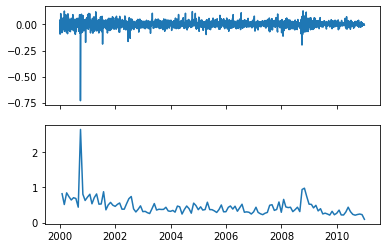

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
plt.show()